### Визуализация данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

### **Часть 1.** Анализ вероятности поступления в магистратуру.

Загрузим данные для анализа

In [2]:
admission_dataset = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
admission_dataset.head(4)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80


### Описание данных
Датасет содержит информацию о результатах тестов и успеваемости студентов. Целевой переменной(Chance of Admit) является вероятность поступления в магистратуру.

Подробности по ссылке ниже.

Источник: https://www.kaggle.com/mohansacharya/graduate-admissions/version/2#Admission_Predict_Ver1.1.csv

Посмотрим, какой из признаков является бинарным.

In [5]:
bin_feature = admission_dataset.nunique() 
bin_feature[bin_feature==2]

Research    2
dtype: int64

Как рейтинг университета влияет на шанс поступления? Вычислим абсолютную разницу средних шансов посутпления для студентов из университетов с самым низким и самым высоким рейтингом. 

In [7]:
admission_dataset.groupby('University Rating') \
.agg({'Chance of Admit ': 'mean'}) \
.apply(lambda x: abs(x.iloc[0] - x.iloc[-1]))

Chance of Admit     0.326023
dtype: float64

Попробуем оценить значимость признаков для поступления. Какой из признаков имеет наибольшую положительную корреляцию с шансом поступления. 

In [9]:
x = admission_dataset.corr() \
.drop(index='Chance of Admit ')['Chance of Admit ']
x[x == x.max()]

CGPA    0.882413
Name: Chance of Admit , dtype: float64

Посмотрим на самый важный признак, найденный нами ранее. Построим диаграмму рассеивания(scatter plot) между данным признаком и вероятностью поступления. Посмотрим, как изменяется влияние признака на вероятность поступления в зависимости от значения признака.


Text(0, 0.5, 'Chance of Admit ')

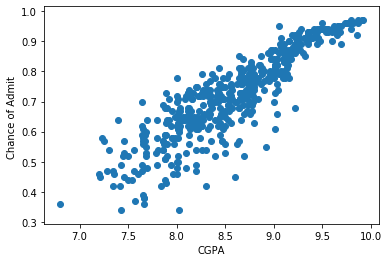

In [11]:
plt.scatter(admission_dataset['CGPA'],
            admission_dataset['Chance of Admit '])
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit ')

Построим распределение целевого признака. Посмотрим, куда смещено распределение шансов поступления для студентов, имеющих опыт исследований.

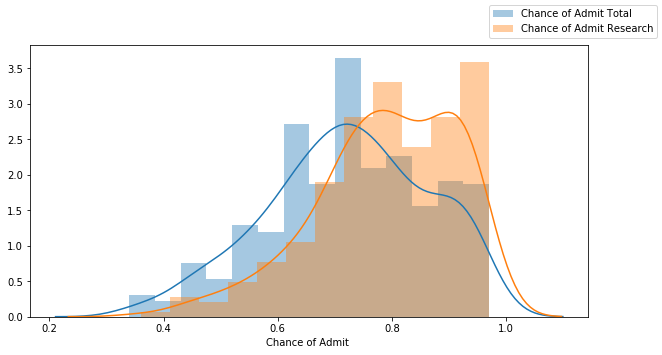

In [13]:
fig = plt.figure(figsize=(10,5))
sns.distplot(admission_dataset['Chance of Admit '])
research_dataset = admission_dataset.query('Research == 1')
sns.distplot(research_dataset['Chance of Admit '])
fig.legend(labels=['Chance of Admit Total', 'Chance of Admit Research'])

### **Часть 2.** Анализ нефтяных данных.

Загрузим данные

In [14]:
well_data = pd.read_csv('contest_train_df.csv',parse_dates = ['Date','Start_date'])

In [15]:
well_data.tail(4) 

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,...,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR
2782437,129.0,2500.0,30.0,40.0,51.0,2190.0,9.0,50.0,73.0,2652.0,...,1,0,1.0,"3,5",625.0,1980-01-04,1979-12-28,6200,42565,1
2782438,130.6,2269.0,64.0,50.0,22.0,2393.0,5.0,50.0,73.0,2791.0,...,1,0,0.0,35,71.0,1980-01-04,1979-12-24,7465,52512,1
2782439,130.6,NaN,396.0,180.0,13.0,2000.0,95.0,200.0,73.0,2260.0,...,1,1,1.0,23,19.0,1980-01-04,1979-12-26,806,4545,1
2782440,129.0,1576.0,430.0,300.0,22.0,1762.0,97.0,500.0,73.0,2005.0,...,1,0,0.0,"7,8",673.0,1980-01-04,1979-12-20,3323,22188,1


Если таблица не помещается на экран, то можно попробовать транспонировать(повернуть) таблицу.

In [16]:
well_data.tail(4).T #T - операция транспонирования(transpose)

,2782437,2782438,2782439,2782440
Dnytr,129,130.6,130.6,129
H_din,2500,2269,NaN,1576
Q_OIS,30,64,396,430
NomMoschn,40,50,180,300
Hperf,51,22,13,22
NomNapor,2190,2393,2000,1762
Water_cut,9,5,95,97
NomPodacha,50,50,200,500
Dnkt,73,73,73,73
H_sp,2652,2791,2260,2005


В какое время года чаще всего проводят мероприятие? Датой проведения мероприятия будем считать дату выхода на режим (VNR==1).

In [63]:
well_data_vnr = well_data.query('VNR == 1') \
.groupby(['Well_ID', 'id']) \
.agg({'Date': 'min'})

well_data_vnr['month'] = well_data_vnr \
.Date.dt.month

months = well_data_vnr.groupby('month') \
.agg({'month': 'count'}) \
.rename(columns={'month': 'month_counts'}).reset_index()
m = np.array(pd.concat([months.iloc[[11], :], months.drop(index=11)]).month_counts)
print({j: m[3*i:2+3*i+1].sum() for i, j in zip(range(4), ['winter', 'spring', 'summer', 'fall'])})

{'winter': 3702, 'spring': 3970, 'summer': 3906, 'fall': 4044}


На одной скважине мероприятие может проводиться несколько раз. Посмотрим, какое максимальное число проведенных мероприятий на одной скважине. 

**Well_ID - идентификатор скважины, id - идентификатор мероприятия*

In [44]:
well_m = well_data.groupby('Well_ID') \
.apply(lambda x: x['id'].nunique())
well_m.max()

9

Посмотрим как улучшаются показатели скважины после проведения мероприятия. Посмотрим, на сколько в среднем увеличивается Q_OIS на дату выхода на режим по сравнению со средними Q_OIS до начала мероприятия(Start_date).

**Группировку выполним по признаку id.*


In [72]:
w_data = well_data[['id', 'VNR', 'Start_date', 'Date', 'Q_OIS']] 

vnr1 = w_data.query('VNR == 1')
date_regime = vnr1.groupby('id', as_index=False) \
.agg({'Date': 'min'}) \
.rename(columns={'Date': 'Date_regime'})
Q_vnr1 = w_data.merge(date_regime, on='id', 
                      how='inner') \
.query('Date == Date_regime')[['id', 'Q_OIS']]

date_vnr0 = w_data.query('VNR == 0') \
.groupby('id', as_index=False) \
.apply(lambda x: x.query('Date < Start_date'))

Q_vnr0_mean = date_vnr0.groupby('id', as_index=False) \
.agg({'Q_OIS': 'mean'})

Q = Q_vnr1.merge(Q_vnr0_mean, on='id', how='inner')
(Q['Q_OIS_x'] - Q['Q_OIS_y']).mean()

55.25783150998944